#Lesson 1 - Introduction

isilib is a python library for creating and anlysing scientific metadata. It uses records obatained from [Web of Science](http://webofknowledge.com) (WOS) and produces graphs.

To begin with, lets create a simple network, first we need to import the packages we will be using. Packages are collections of code that can be used by other programs.

In [1]:
import isilib #This loads isilib as it is not loaded by default
import networkx as nx #Networkx is what we use to contain the networks
import matplotlib.pyplot as plt #We will be using this to create images we will also make them inline
%matplotlib inline

Now we have everthing loaded we can read a file.

In [4]:
RC = isilib.RecordCollection(".")

This function creates a RecordCollection object containing all the WOS records in Lesson-1-data.isi. Lets see how many there are.


In [5]:
len(RC)

32

len() gives the length of objects, so in this case it gives the number of Records in RC. Each Record is all the information from WOS about a single paper, book, or other type of record related to science. If we want to look at one of them we can use peak().

In [12]:
R = RC.peak()

We can print the name using print().

In [11]:
print(R) #prints the name of the record, if one exists

Longitudinal and transverse effects of nonspecular reflection


R is now a random Record from those in RC. Record collections are not ordered so peak() will return a random one. We can look more closely at R using dir().

In [5]:
', '.join(dir(R)) #The join() makes the output look nicer

'AB, AF, AU, BP, C1, CR, DI, DOI, DT, EM, EP, GA, ID, IS, ISSN, J9, JI, LA, NR, PA, PD, PG, PI, PT, PU, PY, RP, SC, SN, SO, TC, TI, UT, VL, WC, Z9, __class__, __delattr__, __dict__, __dir__, __doc__, __eq__, __format__, __ge__, __getattribute__, __getstate__, __gt__, __hash__, __init__, __le__, __lt__, __module__, __ne__, __new__, __reduce__, __reduce_ex__, __repr__, __setattr__, __setstate__, __sizeof__, __str__, __subclasshook__, __weakref__, _fieldDict, _sourceFile, _sourceLine, _unComputedTags, _wosNum, abstract, authAddress, authorsFull, authorsShort, bad, beginningPage, citations, citedRefsCount, createCitation, docType, documentDeliveryNumber, email, endingPage, error, getTag, getTagsDict, getTagsList, isoAbbreviation, issue, j9, journal, keyWords, language, month, pageCount, pubType, publisher, publisherAddress, publisherCity, reprintAddress, subjectCategory, subjects, tags, title, totalTimesCited, volume, wosString, wosTimesCited, writeRecord, year'

That is a lot of things each is what is called an attribute. Attributes are either pieces of inforamtion stored by the object, i.e. wosString stores the WOS number of the record, or methods, functions involving the object, i.e. writeRecord which will write the orinal record to a file. The two letter strings AF, C1, PG, etc, are diffecter WOS tags the Record has, they also have a full name that returns the same information for the preceeding tags the full names are: authorsFull, authAddress and pageCount respectively. The attributes starting with one or two underscores \_ are private. They are used by the class to contain or use information that are not meant to be accessed, avoid using them unless you knwo what you are doing. The remainder such as writeRecord are attributes defined for all Records.

Using the attributes of the Records a RecordCollection can create different networks. Lets make a network of authors and paper titles.

In [4]:
G = RC.twoModeNetwork('title', 'CR', recordType = True) #Making a network called G of authors and citations

Now that we have the network, called G, we can display it.

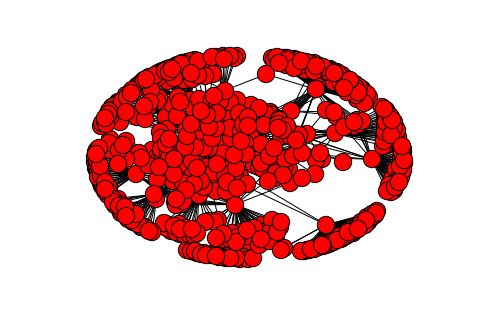

In [6]:
nx.draw_spring(G)

This is a basic visualization and with a little bit more work we can make it look nicer

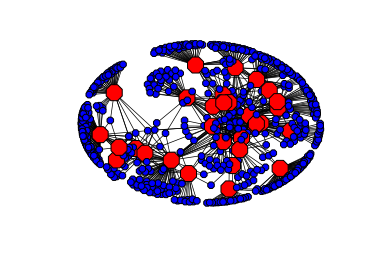

In [31]:
#You do not need to understand this, but I am setting a some of variables for each node.
nodelst = G.nodes(data = True)
colourslst = []
sizelst = []
layout = nx.spring_layout(G)
for n in nodelst:
    if n[1]['type'] == 'CR':
        colourslst.append('b')
        sizelst.append(50)
    else:
        colourslst.append('r')
        sizelst.append(300)
    
#Now all the variables have been set we can use them as optional arguments in nx.draw_networkx_nodes() and nx.draw_networkx_edges()
#Read the networkx documentation if you want to learn about what each one does

nx.draw_networkx_nodes(G,pos=layout, node_color = colourslst, node_shape = '8', node_size  = sizelst)
nx.draw_networkx_edges(G,pos=layout, width = .7)
tmp = plt.axis('off') #hiding axis, tmp is there to cath the output/make things look nicer

In this graph I have shrunk the citations and coloured them blue and the titles have been made red.

When doing this outside of a notebook the image can be as large as you want, although if you really want to make a nice looking graph use Gephi or Visone.

This is the basics of isilib